In [20]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
digits = datasets.load_digits()

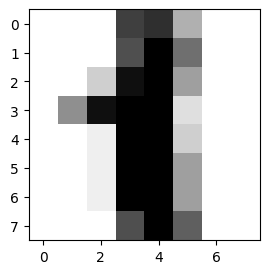

In [4]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

<Figure size 640x480 with 0 Axes>

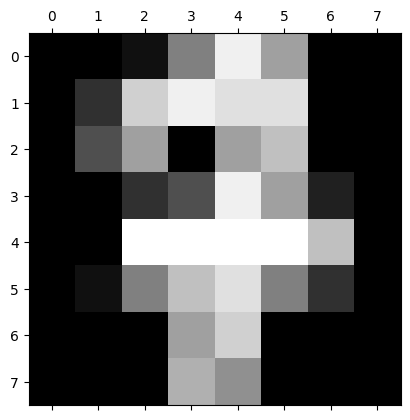

In [6]:
plt.gray() 
plt.matshow(digits.images[17]) 
digits.target[17]
plt.show() 

In [ ]:
X = digits.data
y = digits.target

# Création de l'objet KMeans
kmeans = KMeans(n_clusters=10)

# Entraînement du modèle sur les données
kmeans.fit(X)

# Récupération des clusters prédits
predicted_clusters = kmeans.predict(X)

In [ ]:
for i in range(len(X)):
    # Affichage de l'image
    #plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')

    # Affichage de l'étiquette et du cluster prédit
    plt.title("Label: %d, Cluster: %d" % (y[i], predicted_clusters[i]))
    plt.show()

<AxesSubplot:xlabel='col_0', ylabel='row_0'>

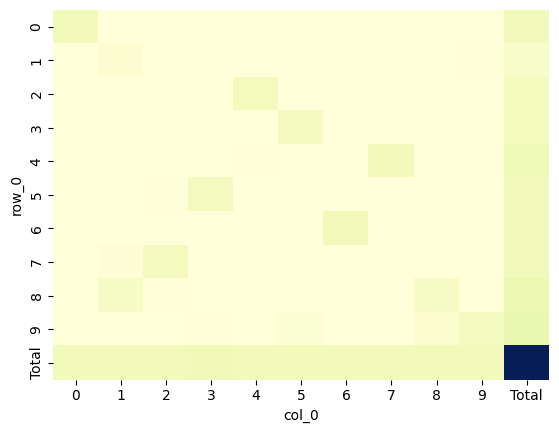

In [17]:
import seaborn as sns
sns.heatmap(pd.crosstab(predicted_clusters, y, margins=True, margins_name="Total"),cmap="YlGnBu", annot = True cbar = False)

## Plot le centre des clusters

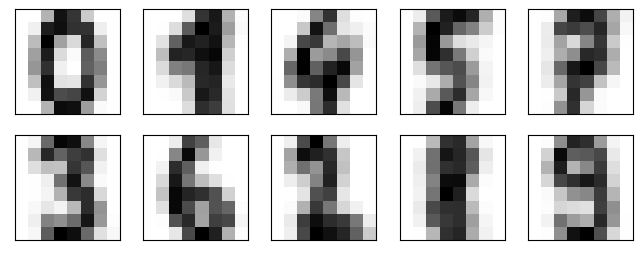

In [18]:

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)



## Changement des clusters

In [22]:
clusters = kmeans.fit_predict(digits.data)
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

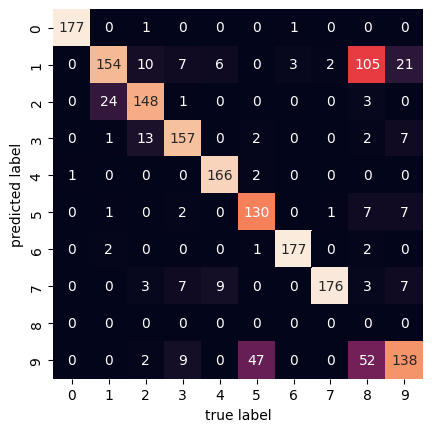

In [23]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Confusion entre le 8 et le 1, 9 et 5

## Nouvelle approche Agglomérative Agregation

In [24]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [ ]:
# On laisse modèle tourner sans spécifier le nombre de classes au départ
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

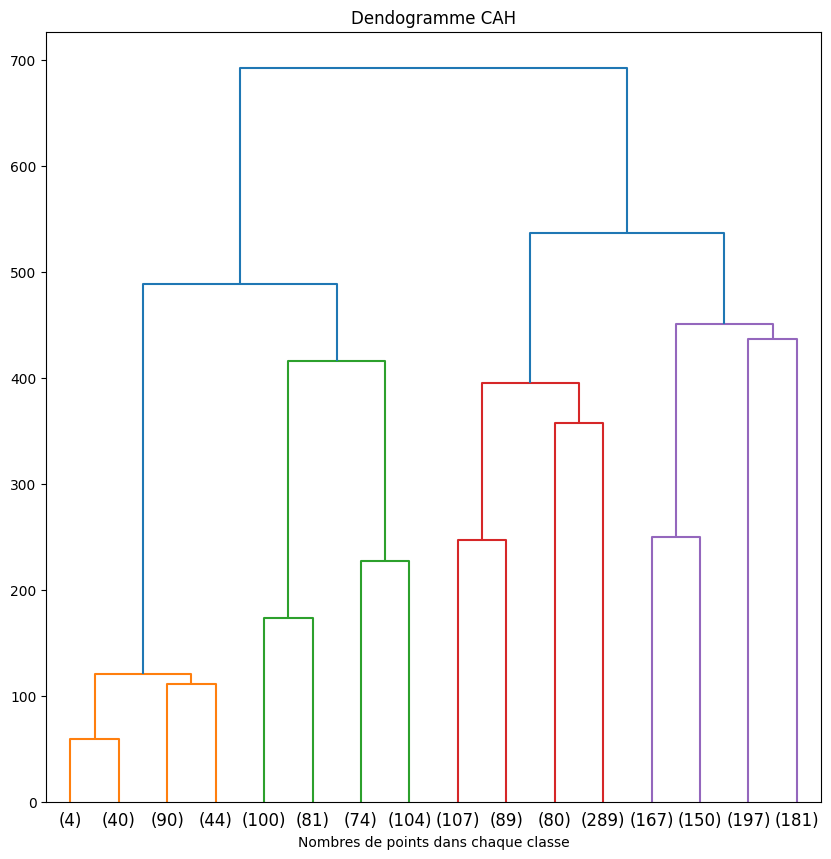

In [29]:
fig, ax = plt.subplots(figsize=(10,10))    
plt.title("Dendogramme CAH")
# valeurs de p à modifier pour l'observation
plot_dendrogram(model, truncate_mode="level", p=5)
plt.xlabel("Nombres de points dans chaque classe")
plt.show()

On compte le nombre de classe en essayant de répartir de manière uniforme le nombre de points par classes.
On fixe maintenant le nombre de classes

In [32]:
model1 = AgglomerativeClustering(n_clusters=10, compute_distances = True)
model1 = model1.fit(X)

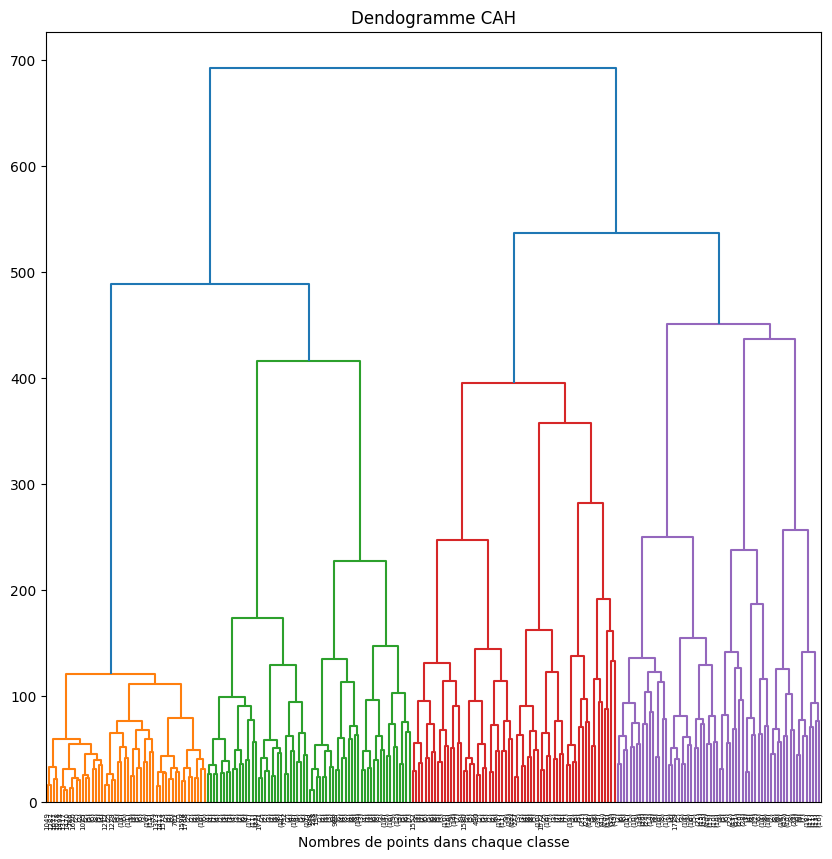

In [34]:
fig, ax = plt.subplots(figsize=(10,10))    
plt.title("Dendogramme CAH")
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode="level", p=7)
plt.xlabel("Nombres de points dans chaque classe")
plt.show()

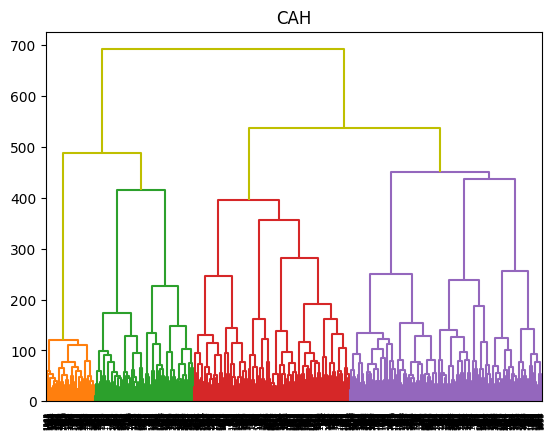

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X,method='ward',metric='euclidean')
plt.title("CAH")
dendrogram(Z,orientation='top',above_threshold_color='y')
plt.show()

In [46]:
print(Z)
Z.shape

[[1.58500000e+03 1.64800000e+03 5.29150262e+00 2.00000000e+00]
 [1.24700000e+03 1.25000000e+03 7.54983444e+00 2.00000000e+00]
 [7.77000000e+02 1.23700000e+03 7.93725393e+00 2.00000000e+00]
 ...
 [3.55700000e+03 3.58700000e+03 4.88617614e+02 5.37000000e+02]
 [3.58600000e+03 3.58900000e+03 5.36321258e+02 1.26000000e+03]
 [3.59000000e+03 3.59100000e+03 6.91961227e+02 1.79700000e+03]]


(1796, 4)

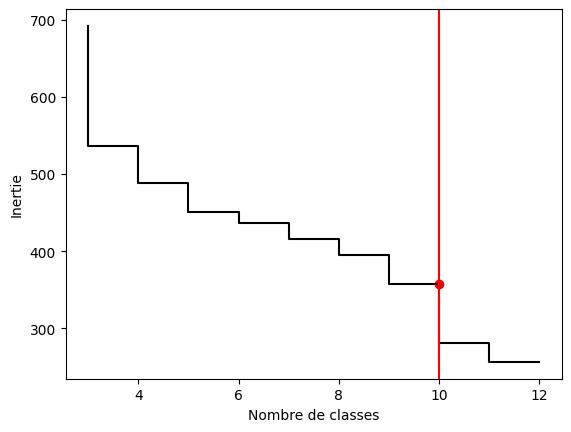

In [54]:
last = Z[-10:, 2]
last_rev = last[::-1]

idxs = np.arange(3, len(last) + 3)
plt.step(idxs, last_rev, c="black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")
nombre = 10 # Ici, on teste le scénario où il y aurait 10 catégories
plt.scatter(idxs[np.where(idxs==nombre)], last_rev[np.where(idxs==nombre)], c="red")
plt.axvline(idxs[np.where(idxs==nombre)], c="red")
plt.show()

In [55]:
print(idxs)

[ 3  4  5  6  7  8  9 10 11 12]
